In [3]:
%pip install --upgrade pip
%pip install tensorflow
%pip install BeautifulSoup4
%pip install -U matplotlib
%pip install -U scikit-learn

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/MyDrive/NITK/4th_Year/Major_Project/ILSUM_Competition/Code

/content/drive/MyDrive/NITK/4th_Year/Major_Project/ILSUM_Competition/Code


In [6]:
from AttentionLayer import AttentionLayer

In [7]:
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [8]:
data = pd.read_csv("../Dataset/english_train.csv", nrows = 100000)
data.head()

,Id,Heading,Summary,Article,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,english_2023_train_0,"Barbie Review: Greta Gerwig, Margot Robbie, Ryan Gosling Film Is Not Plastic But Fantastic",Barbie Movie Review: Ryan Gosling shines the brightest in the Greta Gerwig film. Margot Robbie proves she was meant for this role.,"Barbie Movie Review: One mention of Barbie and you instantly think of a lean, tall-figured doll who is always well-dressed and has a perfect life. This stereotype is stuck with the doll for years,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,english_2023_train_1,Gadar 2: Sunny Deol-Ameesha Patel Starrer's Trailer To Release On July 25 now? | Exclusive,A source close to the film told News18 exclusively that Gadar 2 makers have preponed their plans for the trailer release.,"The highly anticipated Gadar 2, starring Sunny Deol and Ameesha Patel, is generating excitement among fans. According to a report from Bollywood Hungama, the trailer of Gadar 2 was earlier expecte...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,english_2023_train_2,"Kartik Aaryan Ditches First Class To Fly In Economy, Video From Flight Goes Viral",Kartik Aaryan was spotted flying in economy class. An Instagram page shared a video of the actor on board an IndiGo flight.,"Kartik Aaryan, who is gearing up for the release of SatyaPrem Ki Katha, has once again sent his fans into a meltdown with his down-to-earth gesture. Kartik, the owner of multiple luxury cars inclu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,english_2023_train_3,"India's Anju, Now Fatima, Receives Land, Money As Gift From Pak Businessman For Converting to Islam","Abbasi had said that it was important to make Anju feel welcomed and valued in Pakistan after she travelled from India, leaving her family to meet Nasrullah and marry him","Indian woman, Anju who travelled to Pakistan to meet and marry her lover Nasrullah, was gifted a piece of land, Pakistan Rs 50,000 and other gifts by a Pakistani businessman. Mohsin Khan Abbasi, C...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,english_2023_train_4,Himachal Pradesh Hotels Offer 50% Discount As Tourism Tumbles In State Due To Monsoon Fury,Flash floods and landslides caused by heavy downpour in the state has claimed 187 lives since the onset of the Monsoon in the state on June 24. The hotel occupancy rate in Himachal is at almost ze...,"Himachal Pradesh, one of the worst hit states by the monsoon fury this year, is calling tourists back to lustrous green mountains. To woo back tourists who are largely avoiding travel to the state...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data = data[['Id', 'Heading', 'Article', 'Summary']]
data.drop_duplicates(subset = ['Article', 'Summary'], inplace = True)
data.dropna(axis = 0, inplace = True)
data.head()

,Id,Heading,Article,Summary
0,english_2023_train_0,"Barbie Review: Greta Gerwig, Margot Robbie, Ryan Gosling Film Is Not Plastic But Fantastic","Barbie Movie Review: One mention of Barbie and you instantly think of a lean, tall-figured doll who is always well-dressed and has a perfect life. This stereotype is stuck with the doll for years,...",Barbie Movie Review: Ryan Gosling shines the brightest in the Greta Gerwig film. Margot Robbie proves she was meant for this role.
1,english_2023_train_1,Gadar 2: Sunny Deol-Ameesha Patel Starrer's Trailer To Release On July 25 now? | Exclusive,"The highly anticipated Gadar 2, starring Sunny Deol and Ameesha Patel, is generating excitement among fans. According to a report from Bollywood Hungama, the trailer of Gadar 2 was earlier expecte...",A source close to the film told News18 exclusively that Gadar 2 makers have preponed their plans for the trailer release.
2,english_2023_train_2,"Kartik Aaryan Ditches First Class To Fly In Economy, Video From Flight Goes Viral","Kartik Aaryan, who is gearing up for the release of SatyaPrem Ki Katha, has once again sent his fans into a meltdown with his down-to-earth gesture. Kartik, the owner of multiple luxury cars inclu...",Kartik Aaryan was spotted flying in economy class. An Instagram page shared a video of the actor on board an IndiGo flight.
3,english_2023_train_3,"India's Anju, Now Fatima, Receives Land, Money As Gift From Pak Businessman For Converting to Islam","Indian woman, Anju who travelled to Pakistan to meet and marry her lover Nasrullah, was gifted a piece of land, Pakistan Rs 50,000 and other gifts by a Pakistani businessman. Mohsin Khan Abbasi, C...","Abbasi had said that it was important to make Anju feel welcomed and valued in Pakistan after she travelled from India, leaving her family to meet Nasrullah and marry him"
4,english_2023_train_4,Himachal Pradesh Hotels Offer 50% Discount As Tourism Tumbles In State Due To Monsoon Fury,"Himachal Pradesh, one of the worst hit states by the monsoon fury this year, is calling tourists back to lustrous green mountains. To woo back tourists who are largely avoiding travel to the state...",Flash floods and landslides caused by heavy downpour in the state has claimed 187 lives since the onset of the Monsoon in the state on June 24. The hotel occupancy rate in Himachal is at almost ze...


In [10]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}


In [11]:
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString).text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in data['Article']:
    cleaned_text.append(text_cleaner(t))

print(len(cleaned_text))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


27829


In [12]:
data['cleaned_article'] = cleaned_text
data.head()

,Id,Heading,Article,Summary,cleaned_article
0,english_2023_train_0,"Barbie Review: Greta Gerwig, Margot Robbie, Ryan Gosling Film Is Not Plastic But Fantastic","Barbie Movie Review: One mention of Barbie and you instantly think of a lean, tall-figured doll who is always well-dressed and has a perfect life. This stereotype is stuck with the doll for years,...",Barbie Movie Review: Ryan Gosling shines the brightest in the Greta Gerwig film. Margot Robbie proves she was meant for this role.,barbie movie review one mention barbie instantly think lean tall figured doll always well dressed perfect life stereotype stuck doll years despite numerous new designs models introduced director g...
1,english_2023_train_1,Gadar 2: Sunny Deol-Ameesha Patel Starrer's Trailer To Release On July 25 now? | Exclusive,"The highly anticipated Gadar 2, starring Sunny Deol and Ameesha Patel, is generating excitement among fans. According to a report from Bollywood Hungama, the trailer of Gadar 2 was earlier expecte...",A source close to the film told News18 exclusively that Gadar 2 makers have preponed their plans for the trailer release.,highly anticipated gadar starring sunny deol ameesha patel generating excitement among fans according report bollywood hungama trailer gadar earlier expected release july however sources close pro...
2,english_2023_train_2,"Kartik Aaryan Ditches First Class To Fly In Economy, Video From Flight Goes Viral","Kartik Aaryan, who is gearing up for the release of SatyaPrem Ki Katha, has once again sent his fans into a meltdown with his down-to-earth gesture. Kartik, the owner of multiple luxury cars inclu...",Kartik Aaryan was spotted flying in economy class. An Instagram page shared a video of the actor on board an IndiGo flight.,kartik aaryan gearing release satyaprem katha sent fans meltdown earth gesture kartik owner multiple luxury cars including lamborghini urus capsule ditched first class fly economy recent travel vi...
3,english_2023_train_3,"India's Anju, Now Fatima, Receives Land, Money As Gift From Pak Businessman For Converting to Islam","Indian woman, Anju who travelled to Pakistan to meet and marry her lover Nasrullah, was gifted a piece of land, Pakistan Rs 50,000 and other gifts by a Pakistani businessman. Mohsin Khan Abbasi, C...","Abbasi had said that it was important to make Anju feel welcomed and valued in Pakistan after she travelled from India, leaving her family to meet Nasrullah and marry him",indian woman anju travelled pakistan meet marry lover nasrullah gifted piece land pakistan gifts pakistani businessman mohsin khan abbasi ceo pak star group companies gave gifts encouragement conv...
4,english_2023_train_4,Himachal Pradesh Hotels Offer 50% Discount As Tourism Tumbles In State Due To Monsoon Fury,"Himachal Pradesh, one of the worst hit states by the monsoon fury this year, is calling tourists back to lustrous green mountains. To woo back tourists who are largely avoiding travel to the state...",Flash floods and landslides caused by heavy downpour in the state has claimed 187 lives since the onset of the Monsoon in the state on June 24. The hotel occupancy rate in Himachal is at almost ze...,himachal pradesh one worst hit states monsoon fury year calling tourists back lustrous green mountains woo back tourists largely avoiding travel state amid heavy rains himachal pradesh hotel assoc...


In [13]:
data['Summary'][:10]

0                                                                         Barbie Movie Review: Ryan Gosling shines the brightest in the Greta Gerwig film. Margot Robbie proves she was meant for this role.
1                                                                                  A source close to the film told News18 exclusively that Gadar 2 makers have preponed their plans for the trailer release.
2                                                                                Kartik Aaryan was spotted flying in economy class. An Instagram page shared a video of the actor on board an IndiGo flight.
3                                 Abbasi had said that it was important to make Anju feel welcomed and valued in Pakistan after she travelled from India, leaving her family to meet Nasrullah and marry him
4    Flash floods and landslides caused by heavy downpour in the state has claimed 187 lives since the onset of the Monsoon in the state on June 24. The hotel occupancy rate in Him

In [14]:
def summary_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:
            newString=newString+i+' '
    return newString

#Call the above function
cleaned_summary = []
for t in data['Summary']:
    cleaned_summary.append(summary_cleaner(t))

data['cleaned_article'] = cleaned_text
data['cleaned_summary'] = cleaned_summary
data['cleaned_summary'].replace('', np.nan, inplace=True)
data.dropna(axis = 0, inplace = True)

In [15]:
data.head()

,Id,Heading,Article,Summary,cleaned_article,cleaned_summary
0,english_2023_train_0,"Barbie Review: Greta Gerwig, Margot Robbie, Ryan Gosling Film Is Not Plastic But Fantastic","Barbie Movie Review: One mention of Barbie and you instantly think of a lean, tall-figured doll who is always well-dressed and has a perfect life. This stereotype is stuck with the doll for years,...",Barbie Movie Review: Ryan Gosling shines the brightest in the Greta Gerwig film. Margot Robbie proves she was meant for this role.,barbie movie review one mention barbie instantly think lean tall figured doll always well dressed perfect life stereotype stuck doll years despite numerous new designs models introduced director g...,barbie movie review ryan gosling shines the brightest in the greta gerwig film margot robbie proves she was meant for this role
1,english_2023_train_1,Gadar 2: Sunny Deol-Ameesha Patel Starrer's Trailer To Release On July 25 now? | Exclusive,"The highly anticipated Gadar 2, starring Sunny Deol and Ameesha Patel, is generating excitement among fans. According to a report from Bollywood Hungama, the trailer of Gadar 2 was earlier expecte...",A source close to the film told News18 exclusively that Gadar 2 makers have preponed their plans for the trailer release.,highly anticipated gadar starring sunny deol ameesha patel generating excitement among fans according report bollywood hungama trailer gadar earlier expected release july however sources close pro...,source close to the film told news exclusively that gadar makers have preponed their plans for the trailer release
2,english_2023_train_2,"Kartik Aaryan Ditches First Class To Fly In Economy, Video From Flight Goes Viral","Kartik Aaryan, who is gearing up for the release of SatyaPrem Ki Katha, has once again sent his fans into a meltdown with his down-to-earth gesture. Kartik, the owner of multiple luxury cars inclu...",Kartik Aaryan was spotted flying in economy class. An Instagram page shared a video of the actor on board an IndiGo flight.,kartik aaryan gearing release satyaprem katha sent fans meltdown earth gesture kartik owner multiple luxury cars including lamborghini urus capsule ditched first class fly economy recent travel vi...,kartik aaryan was spotted flying in economy class an instagram page shared video of the actor on board an indigo flight
3,english_2023_train_3,"India's Anju, Now Fatima, Receives Land, Money As Gift From Pak Businessman For Converting to Islam","Indian woman, Anju who travelled to Pakistan to meet and marry her lover Nasrullah, was gifted a piece of land, Pakistan Rs 50,000 and other gifts by a Pakistani businessman. Mohsin Khan Abbasi, C...","Abbasi had said that it was important to make Anju feel welcomed and valued in Pakistan after she travelled from India, leaving her family to meet Nasrullah and marry him",indian woman anju travelled pakistan meet marry lover nasrullah gifted piece land pakistan gifts pakistani businessman mohsin khan abbasi ceo pak star group companies gave gifts encouragement conv...,abbasi had said that it was important to make anju feel welcomed and valued in pakistan after she travelled from india leaving her family to meet nasrullah and marry him
4,english_2023_train_4,Himachal Pradesh Hotels Offer 50% Discount As Tourism Tumbles In State Due To Monsoon Fury,"Himachal Pradesh, one of the worst hit states by the monsoon fury this year, is calling tourists back to lustrous green mountains. To woo back tourists who are largely avoiding travel to the state...",Flash floods and landslides caused by heavy downpour in the state has claimed 187 lives since the onset of the Monsoon in the state on June 24. The hotel occupancy rate in Himachal is at almost ze...,himachal pradesh one worst hit states monsoon fury year calling tourists back lustrous green mountains woo back tourists largely avoiding travel state amid heavy rains himachal pradesh hotel assoc...,flash floods and landslides caused by heavy downpour in the state has c

In [16]:
data['cleaned_summary'] = data['cleaned_summary'].apply(lambda x : '_START_ ' + x + ' _END_')
data.head()

,Id,Heading,Article,Summary,cleaned_article,cleaned_summary
0,english_2023_train_0,"Barbie Review: Greta Gerwig, Margot Robbie, Ryan Gosling Film Is Not Plastic But Fantastic","Barbie Movie Review: One mention of Barbie and you instantly think of a lean, tall-figured doll who is always well-dressed and has a perfect life. This stereotype is stuck with the doll for years,...",Barbie Movie Review: Ryan Gosling shines the brightest in the Greta Gerwig film. Margot Robbie proves she was meant for this role.,barbie movie review one mention barbie instantly think lean tall figured doll always well dressed perfect life stereotype stuck doll years despite numerous new designs models introduced director g...,_START_ barbie movie review ryan gosling shines the brightest in the greta gerwig film margot robbie proves she was meant for this role _END_
1,english_2023_train_1,Gadar 2: Sunny Deol-Ameesha Patel Starrer's Trailer To Release On July 25 now? | Exclusive,"The highly anticipated Gadar 2, starring Sunny Deol and Ameesha Patel, is generating excitement among fans. According to a report from Bollywood Hungama, the trailer of Gadar 2 was earlier expecte...",A source close to the film told News18 exclusively that Gadar 2 makers have preponed their plans for the trailer release.,highly anticipated gadar starring sunny deol ameesha patel generating excitement among fans according report bollywood hungama trailer gadar earlier expected release july however sources close pro...,_START_ source close to the film told news exclusively that gadar makers have preponed their plans for the trailer release _END_
2,english_2023_train_2,"Kartik Aaryan Ditches First Class To Fly In Economy, Video From Flight Goes Viral","Kartik Aaryan, who is gearing up for the release of SatyaPrem Ki Katha, has once again sent his fans into a meltdown with his down-to-earth gesture. Kartik, the owner of multiple luxury cars inclu...",Kartik Aaryan was spotted flying in economy class. An Instagram page shared a video of the actor on board an IndiGo flight.,kartik aaryan gearing release satyaprem katha sent fans meltdown earth gesture kartik owner multiple luxury cars including lamborghini urus capsule ditched first class fly economy recent travel vi...,_START_ kartik aaryan was spotted flying in economy class an instagram page shared video of the actor on board an indigo flight _END_
3,english_2023_train_3,"India's Anju, Now Fatima, Receives Land, Money As Gift From Pak Businessman For Converting to Islam","Indian woman, Anju who travelled to Pakistan to meet and marry her lover Nasrullah, was gifted a piece of land, Pakistan Rs 50,000 and other gifts by a Pakistani businessman. Mohsin Khan Abbasi, C...","Abbasi had said that it was important to make Anju feel welcomed and valued in Pakistan after she travelled from India, leaving her family to meet Nasrullah and marry him",indian woman anju travelled pakistan meet marry lover nasrullah gifted piece land pakistan gifts pakistani businessman mohsin khan abbasi ceo pak star group companies gave gifts encouragement conv...,_START_ abbasi had said that it was important to make anju feel welcomed and valued in pakistan after she travelled from india leaving her family to meet nasrullah and marry him _END_
4,english_2023_train_4,Himachal Pradesh Hotels Offer 50% Discount As Tourism Tumbles In State Due To Monsoon Fury,"Himachal Pradesh, one of the worst hit states by the monsoon fury this year, is calling tourists back to lustrous green mountains. To woo back tourists who are largely avoiding travel to the state...",Flash floods and landslides caused by heavy downpour in the state has claimed 187 lives since the onset of the Monsoon in the state on June 24. The hotel occupancy rate in Himachal is at almost ze...,himachal pradesh one worst hit states monsoon fury year calling tourists back lustrous green mountains woo back tourists largely avoiding travel state amid heavy rains himachal pradesh hotel assoc...,_START_ flash f

In [17]:
for i in range(5):
    print(f"Review: {data['cleaned_article'][i]}")
    print(f"Summary: {data['cleaned_summary'][i]}")
    print("\n")

Review: barbie movie review one mention barbie instantly think lean tall figured doll always well dressed perfect life stereotype stuck doll years despite numerous new designs models introduced director greta gerwig understood stereotypes even plays along first minutes barbie movie however shatters glass soon done playing doll gets business tell relatable feminist applaud worthy movie lives hype barbie starring margot robbie lead set barbie land several kinds barbies existing see stereotype barbie president barbie physicist barbie lawyer barbie among many running barbie land men named ken double supporters lovers partners goes well alter imaginary world one day stereotypical barbie wakes feeling unusual emotions begins wonder death loses ability walk toes exhibits sad emotions approaches weird barbie learns portal barbie land real world led barbie feeling human like emotions advised visit real world find answers driving roads crossing mountains seas barbie ken roller blade venice beach

dict_keys([442, 173, 188, 279, 310, 202, 149, 355, 412, 251, 98, 193, 240, 332, 254, 352, 238, 144, 162, 377, 273, 201, 344, 480, 196, 229, 599, 550, 343, 194, 398, 305, 514, 534, 216, 336, 306, 206, 95, 198, 302, 217, 163, 270, 70, 404, 527, 309, 392, 15, 204, 16, 316, 175, 307, 288, 294, 145, 401, 329, 155, 17, 230, 340, 260, 200, 192, 182, 453, 148, 167, 14, 223, 457, 277, 189, 100, 2, 266, 220, 243, 258, 203, 186, 208, 372, 227, 245, 5, 226, 429, 311, 199, 213, 289, 364, 257, 183, 195, 237, 185, 224, 210, 320, 172, 231, 811, 181, 246, 205, 177, 191, 212, 239, 318, 347, 325, 287, 219, 350, 301, 214, 278, 317, 746, 20, 280, 264, 7, 225, 489, 19, 250, 218, 253, 654, 180, 365, 369, 165, 242, 297, 268, 89, 116, 299, 314, 450, 146, 211, 851, 27, 276, 319, 582, 190, 286, 141, 825, 25, 476, 153, 436, 271, 139, 137, 113, 12, 132, 112, 267, 282, 349, 275, 252, 283, 93, 234, 158, 440, 724, 222, 174, 164, 293, 256, 312, 330, 265, 176, 405, 140, 187, 263, 232, 233, 337, 269, 298, 249, 247, 304,

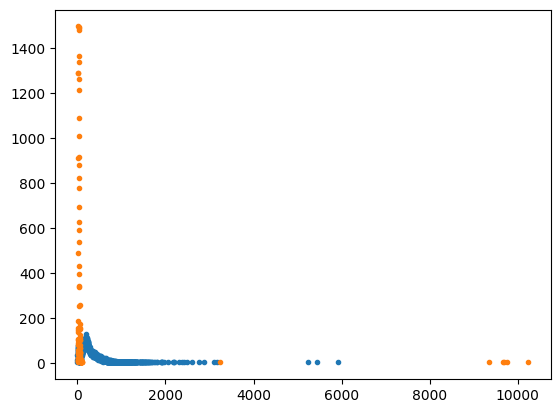

In [18]:
import matplotlib.pyplot as plt
# article_word_count = []
# summary_word_count = []

article_word_count_dict = {}
summary_word_count_dict = {}

# populate the lists with sentence lengths
for article in data['cleaned_article']:
      length_of_article = len(article.split())
      if length_of_article in article_word_count_dict:
            article_word_count_dict[length_of_article] += 1
      else:
            article_word_count_dict[length_of_article] = 1

for summary in data['cleaned_summary']:
      length_of_summary = len(summary.split())
      if length_of_summary in summary_word_count_dict:
            summary_word_count_dict[length_of_summary] += 1
      else:
            summary_word_count_dict[length_of_summary] = 1

# print(len(article_word_count))
# print(article_word_count[0])
# print(len(summary_word_count))
# print(summary_word_count[0])


# length_df = pd.DataFrame({'text': article_word_count, 'summary': summary_word_count})
# length_df.hist(bins = 30)
# plt.xlim(0, 350)

article_x = article_word_count_dict.keys()
article_y = article_word_count_dict.values()

summary_x = summary_word_count_dict.keys()
summary_y = summary_word_count_dict.values()

print(article_x)
print(article_y)

print(summary_x)
print(summary_y)

plt.plot(article_x, article_y, '.')
plt.plot(summary_x, summary_y, '.')


plt.show()

In [19]:
max_len_article=400
max_len_summary=75

In [20]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(data['cleaned_article'], data['cleaned_summary'], test_size = 0.2, random_state = 0, shuffle = True)

In [30]:
print(x_tr.shape)
print(x_val.shape)
print(y_tr.shape)
print(y_val.shape)


(22263, 400)
(5566, 400)
(22263, 75)
(5566, 75)


In [21]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr)
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_article, padding='post')
x_val   =   pad_sequences(x_val, maxlen=max_len_article, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) + 1

In [22]:
#preparing a tokenizer for summary on training data
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr)
y_val   =   y_tokenizer.texts_to_sequences(y_val)

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) + 1

In [23]:
print(y_voc_size)
print(x_voc_size)

32443
122007


In [24]:
from keras import backend as K
K.clear_session()
latent_dim = 500

# Encoder
encoder_inputs = Input(shape=(max_len_article,))
enc_emb = Embedding(x_voc_size, latent_dim, trainable=True)(encoder_inputs)

#LSTM 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#LSTM 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#LSTM 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder.
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#Attention Layer
attn_layer = AttentionLayer(name = 'attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention output and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 400)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 400, 500)             6100350   ['input_1[0][0]']             
                                                          0                                       
                                                                                                  
 lstm (LSTM)                 [(None, 400, 500),           2002000   ['embedding[0][0]']           
                              (None, 500),                                                        
                              (None, 500)]                                                    

In [25]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [26]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [35]:
history = model.fit(
  [x_tr, y_tr[:, :-1]],
  y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
  epochs = 5,
  callbacks = [es],
  batch_size = 64,
  validation_data = (
      [x_val, y_val[:, :-1]],
      y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]
    )
  )

Epoch 1/5
348/348 [==============================] - 738s 2s/step - loss: 3.0177 - val_loss: 2.8983
Epoch 2/5
348/348 [==============================] - 744s 2s/step - loss: 2.9520 - val_loss: 2.8527
Epoch 3/5
348/348 [==============================] - 714s 2s/step - loss: 2.8934 - val_loss: 2.7882
Epoch 4/5
348/348 [==============================] - 737s 2s/step - loss: 2.8423 - val_loss: 2.7460
Epoch 5/5
348/348 [==============================] - 736s 2s/step - loss: 2.7900 - val_loss: 2.6981


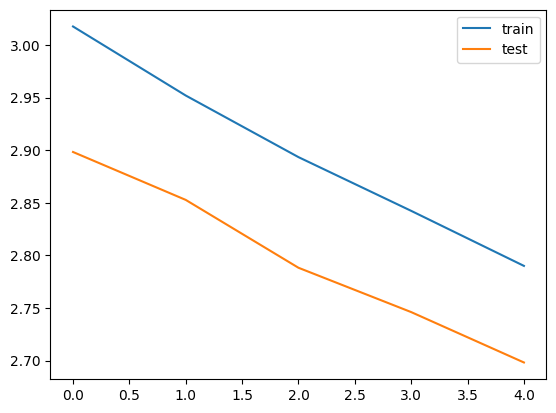

In [37]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [38]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [48]:
print(len(reverse_target_word_index))
print(len(reverse_source_word_index))
print(len(target_word_index))

32442
122006
32442


In [51]:
reverse_target_word_index[32442]

'envisions'

In [41]:
# encoder inference
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_article,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
  [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
  [decoder_outputs2] + [state_h2, state_c2]
)

In [87]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        print(output_tokens[0, -1, :])
        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :].astype(float))
        print(sampled_token_index)
        # if sampled_token_index not in reverse_target_word_index:
        #   continue
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='end'):
            decoded_sentence += ' ' + sampled_token

            # Exit condition: either hit max length or find stop word.
            if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [88]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [89]:
for test_article, test_summary in zip(x_val, y_val):
  print("Review:", seq2text(test_article))
  print("Original summary:", seq2summary(y_val[i]))
  print("Predicted summary:", decode_sequence(test_article.reshape(1, max_len_article)))
  print("\n")

Review: towards climate change including financing developing world green energy plans cutting wasteful consumption india stressing climate change earlier year main climate change monitoring body intergovernmental panel climate change said world needs immediately initiate extraordinary steps limit global temperature rise degrees celsius pre industrial levels actions pledged historic paris cop meet neither ambitious enough adequate address climate crisis paris meet seen countries agree work towards limiting temperature rise degrees celsius pre industrial levels degree threshold mentioned best case scenario however noted current status emissions places planet trajectory clocking temperature rise degrees celsius end century avoid ipcc said global carbon dioxide emissions would need reach net zero around net zero means country produces much carbon dioxide suck atmosphere planting trees deploying technologies yet nascent stages sequester emissions call paved way developed world push univers

KeyError: ignored